In [1]:
#import the required libraries
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten,MaxPooling2D, Dropout
from keras.datasets import mnist
from keras.utils import to_categorical
import matplotlib.pyplot as plt
import numpy as np
from scipy import misc
import imageio
%pylab inline
from PIL import Image
import os
import PIL
import glob
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing.image import img_to_array
from keras.models import Model
from matplotlib import pyplot
from numpy import expand_dims
from sklearn.model_selection import KFold
import tensorflow as tf
import keras
from keras import backend as K
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.models import Model
from matplotlib import pyplot

Populating the interactive namespace from numpy and matplotlib


## load data

(60000, 28, 28)
(10000, 28, 28)


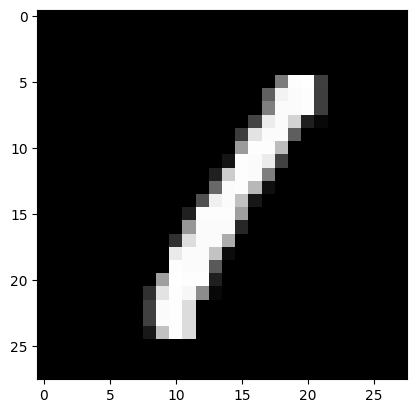

In [25]:


# In[57]:


#load the MNIST data and split it into train and test sets
(X_train,y_train), (X_test, y_test) = mnist.load_data()


# In[58]:


#get the image shape
print(X_train.shape)
print(X_test.shape)


# In[59]:


#print image shape
#X_train[0]


# In[60]:


#Print the image label
y_train[0]


# In[61]:


#plot the image via imshow
image_train = X_train[3]
image_train = np.array(image_train, dtype='float')
pixelst = image_train.reshape((28,28))
plt.imshow(pixelst, cmap='gray')
plt.show()


# In[62]:


## Data Prep

https://www.holisticseo.digital/python-seo/resize-image/

In [5]:


#reshape the data to fit the model
X_train = X_train.reshape(60000, 28,28,1)
X_test = X_test.reshape(10000, 28, 28, 1)


# In[63]:
# normalize inputs from 0-255 to 0-1
X_train = X_train / 255
X_test = X_test / 255


#one-Hot Encoding for fitting it for the model
y_train_one_hot = to_categorical(y_train)
y_test_one_hot = to_categorical(y_test)

#Print the new label
print(y_train_one_hot[0])


# In[ ]:


y_train

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [6]:
model = Sequential()
#Convolutional layer
L1=model.add(Conv2D(24, (3,3), activation='relu', padding="same",input_shape=(28,28,1)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(48, kernel_size=3, activation='relu', padding='same'))
#max pooling
L2=model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, kernel_size=3, activation='relu', padding='same'))

model.add(MaxPooling2D(pool_size=(2, 2)))

L3=model.add(Dropout(0.1))
#dense layer
L4=model.add(Flatten())
L5=model.add(Dense(128, activation='relu'))

L5=model.add(Dense(10, activation='softmax'))
#Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
#train the model
model.summary()




Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 24)        240       
                                                                 
 max_pooling2d (MaxPooling2  (None, 14, 14, 24)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 48)        10416     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 7, 7, 48)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 7, 7, 64)          27712     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 3, 3, 64)          0

In [7]:
hist = model.fit(X_train, y_train_one_hot, validation_data=(X_test, y_test_one_hot), epochs=10)


Epoch 1/10
1875/1875 [==============================] - 13s 4ms/step - loss: 0.1512 - accuracy: 0.9526 - val_loss: 0.0450 - val_accuracy: 0.9865
Epoch 2/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0488 - accuracy: 0.9847 - val_loss: 0.0410 - val_accuracy: 0.9868
Epoch 3/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0354 - accuracy: 0.9888 - val_loss: 0.0259 - val_accuracy: 0.9916
Epoch 4/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0289 - accuracy: 0.9911 - val_loss: 0.0290 - val_accuracy: 0.9914
Epoch 5/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0230 - accuracy: 0.9927 - val_loss: 0.0260 - val_accuracy: 0.9913
Epoch 6/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0199 - accuracy: 0.9934 - val_loss: 0.0302 - val_accuracy: 0.9918
Epoch 7/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0162 - accuracy: 0.9946 - val_loss: 0.0279 - val_accuracy

In [8]:
layer_names = [layer.name for layer in model.layers]
layer_names

['conv2d',
 'max_pooling2d',
 'conv2d_1',
 'max_pooling2d_1',
 'conv2d_2',
 'max_pooling2d_2',
 'dropout',
 'flatten',
 'dense',
 'dense_1']

In [10]:
model_name="CNN_handwritten_mnist_v3.h5"

model.save(model_name)

rec_model=keras.models.load_model(model_name)



/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [11]:
y_test.shape

(10000,)

### Visualizing filters

### Visualizing Intermediate Activations
https://towardsdatascience.com/visualizing-intermediate-activations-of-a-cnn-trained-on-the-mnist-dataset-2c34426416c8

1/1 [==============================] - 0s 216ms/step


<ipython-input-13-f3adf319388f>:30: RuntimeWarning: invalid value encountered in divide
  channel_image /= channel_image.std()
<ipython-input-13-f3adf319388f>:33: RuntimeWarning: invalid value encountered in cast
  channel_image = np.clip(channel_image, 0, 255).astype('uint8')


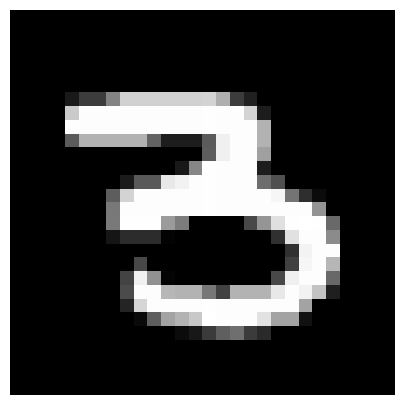

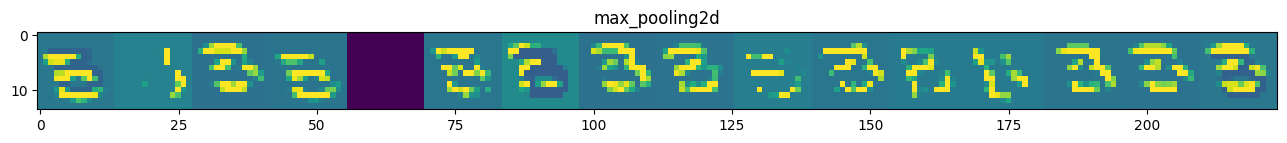

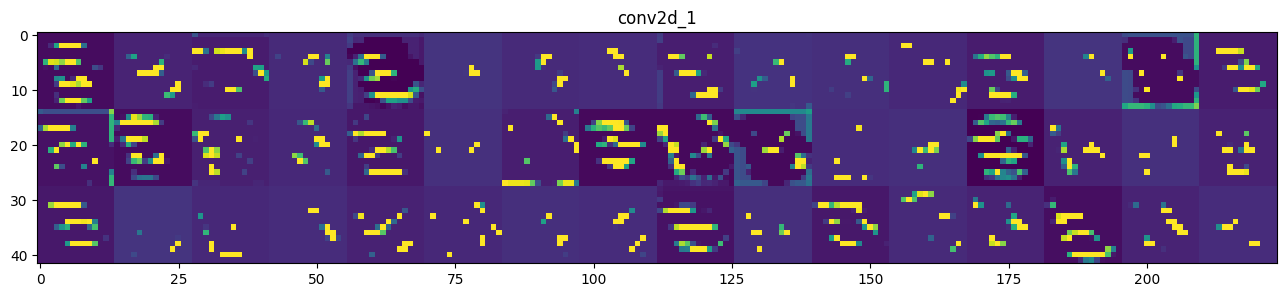

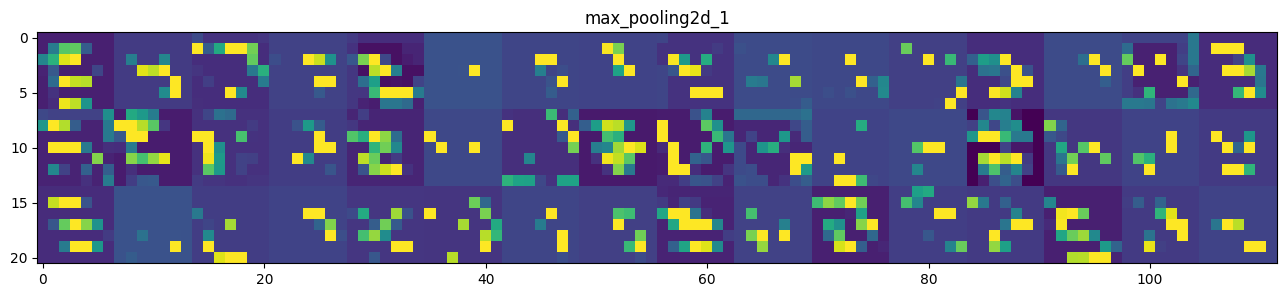

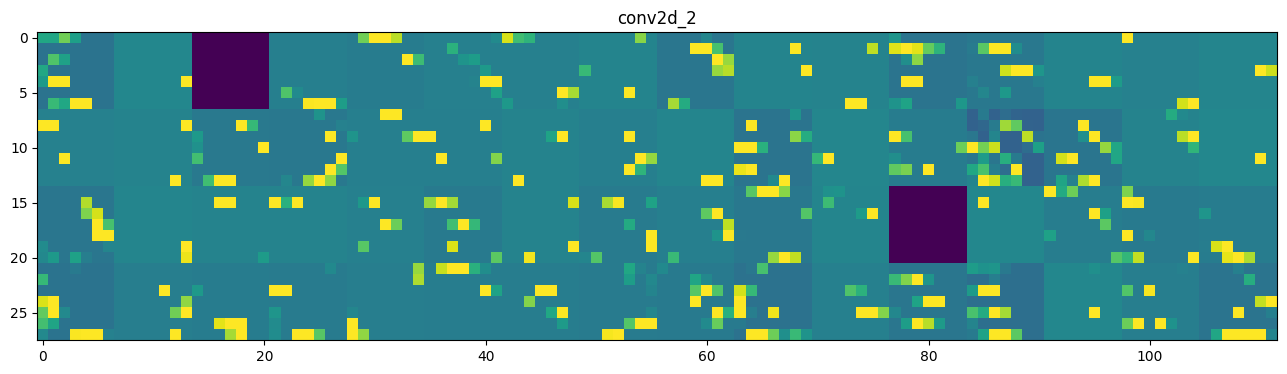

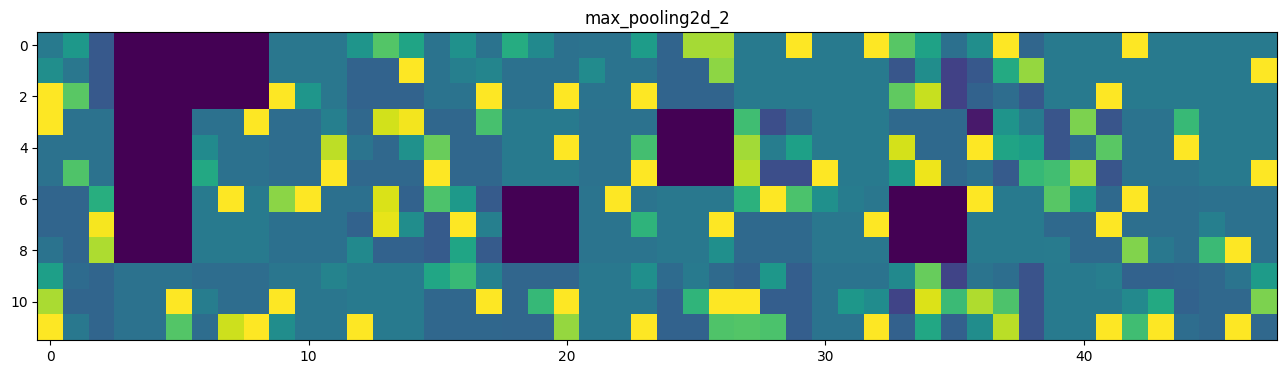

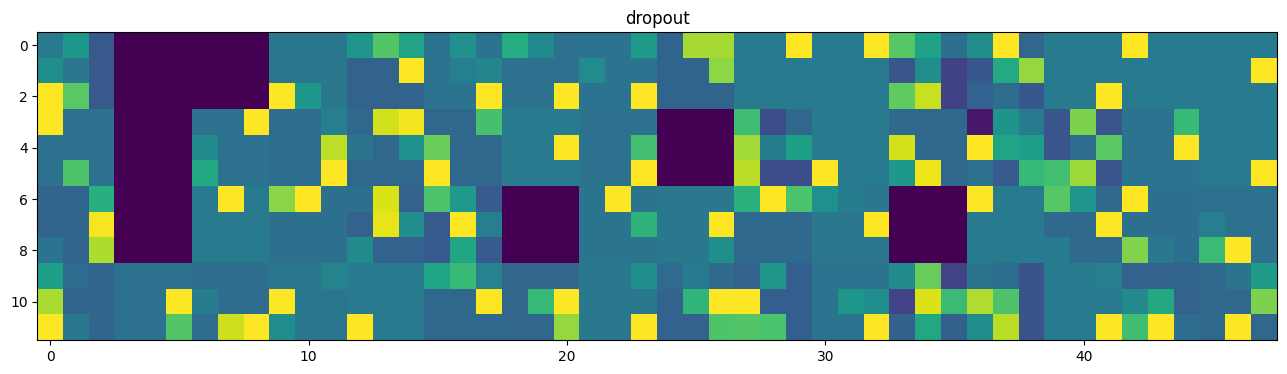

In [13]:
#img_path= "C:/Users/hotaha/OneDrive - dormakaba Group/Desktop/1.jpg"

layer_outputs = [layer.output for layer in model.layers[1:7]]
activation_model = Model(inputs=model.input,outputs=layer_outputs)

img = X_test[51].reshape(1,28,28,1)
fig = plt.figure(figsize=(5,5))
plt.imshow(img[0,:,:,0],cmap="gray")
plt.axis('off')

activations = activation_model.predict(img)

layer_names = []
for layer in model.layers[1:7]:
    layer_names.append(layer.name) # Names of the layers, so you can have them as part of your plot

images_per_row =16

for layer_name, layer_activation in zip(layer_names, activations): # Displays the feature maps
    n_features = layer_activation.shape[-1] # Number of features in the feature map
    size = layer_activation.shape[1] #The feature map has shape (1, size, size, n_features).
    n_cols = n_features // images_per_row # Tiles the activation channels in this matrix
    display_grid = np.zeros((size * n_cols, images_per_row * size))
    for col in range(n_cols): # Tiles each filter into a big horizontal grid
        for row in range(images_per_row):
            channel_image = layer_activation[0,
                                             :, :,
                                             col * images_per_row + row]
            channel_image -= channel_image.mean() # Post-processes the feature to make it visually palatable
            channel_image /= channel_image.std()
            channel_image *= 64
            channel_image += 128
            channel_image = np.clip(channel_image, 0, 255).astype('uint8')
            display_grid[col * size : (col + 1) * size, # Displays the grid
                         row * size : (row + 1) * size] = channel_image
    scale = 1. / size
    plt.figure(figsize=(scale * display_grid.shape[1],
                        scale * display_grid.shape[0]))
    plt.title(layer_name)
    plt.grid(False)
    plt.imshow(display_grid, aspect='auto', cmap='viridis')

<ipython-input-14-3f0982462c17>:21: RuntimeWarning: invalid value encountered in cast
  channel_image = np.clip(channel_image, 0, 255).astype('uint8')


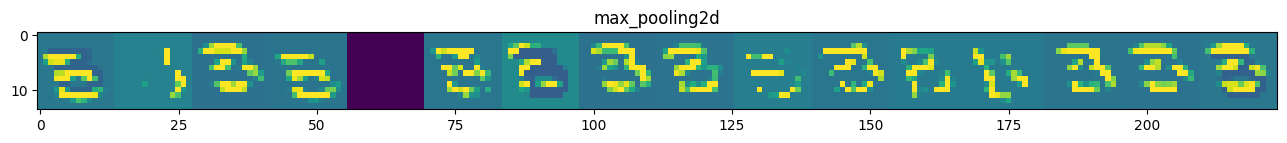

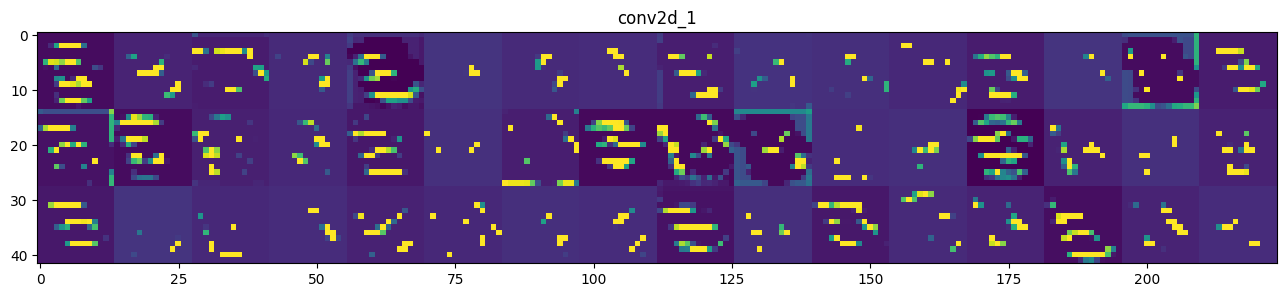

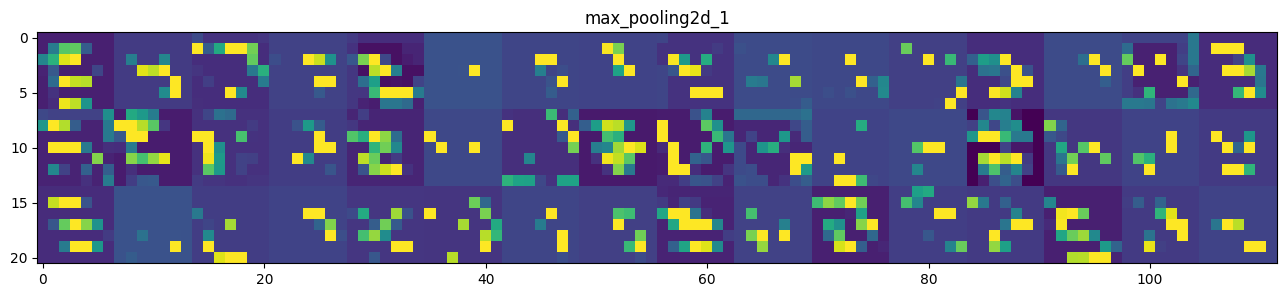

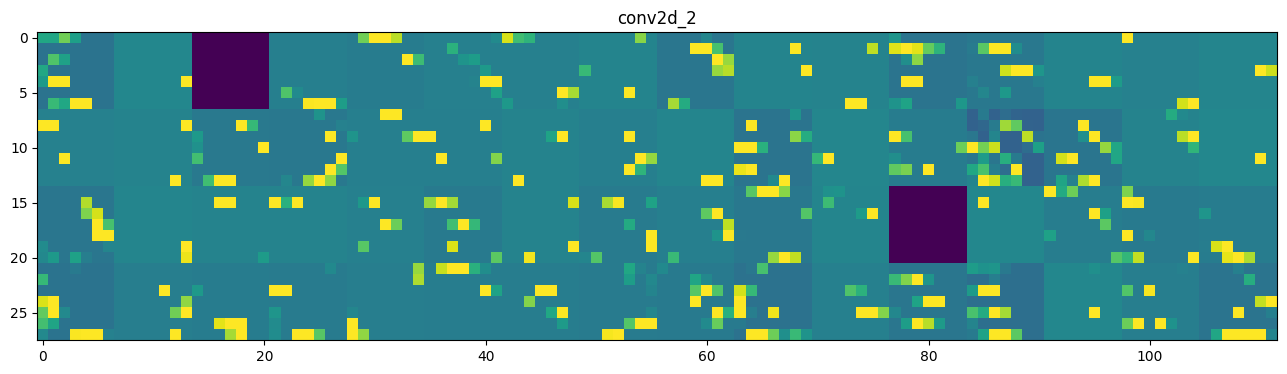

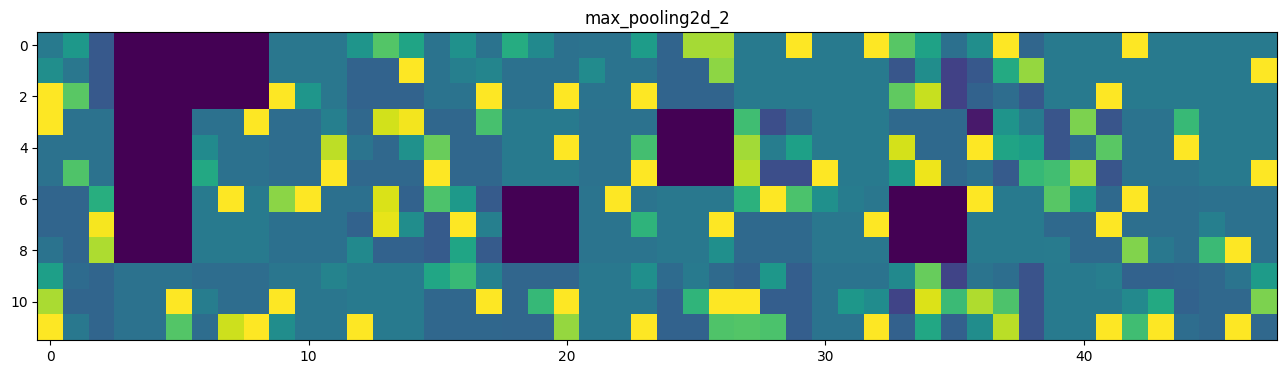

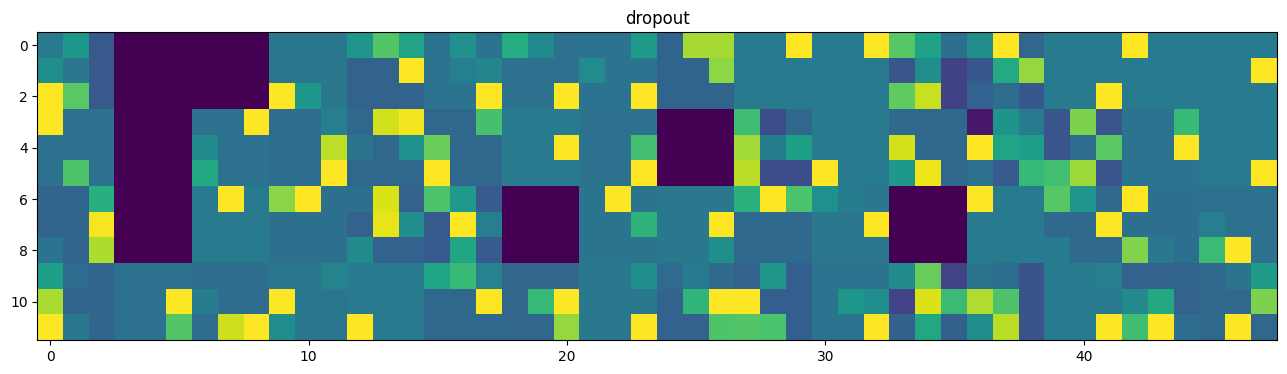

In [14]:
layer_names = []
for layer in model.layers[1:7]:
    layer_names.append(layer.name) # Names of the layers, so you can have them as part of your plot

images_per_row = 16

for layer_name, layer_activation in zip(layer_names, activations): # Displays the feature maps
    n_features = layer_activation.shape[-1] # Number of features in the feature map
    size = layer_activation.shape[1] #The feature map has shape (1, size, size, n_features).
    n_cols = n_features // images_per_row # Tiles the activation channels in this matrix
    display_grid = np.zeros((size * n_cols, images_per_row * size))
    for col in range(n_cols): # Tiles each filter into a big horizontal grid
        for row in range(images_per_row):
            channel_image = layer_activation[0,
                                             :, :,
                                             col * images_per_row + row]
            channel_image -= channel_image.mean() # Post-processes the feature to make it visually palatable
            channel_image /= channel_image.std()
            channel_image *= 64
            channel_image += 128
            channel_image = np.clip(channel_image, 0, 255).astype('uint8')
            display_grid[col * size : (col + 1) * size, # Displays the grid
                         row * size : (row + 1) * size] = channel_image
    scale = 1. / size
    plt.figure(figsize=(scale * display_grid.shape[1],
                        scale * display_grid.shape[0]))
    plt.title(layer_name)
    plt.grid(False)
    plt.imshow(display_grid, aspect='auto', cmap='viridis')

In [15]:
layer_outputs = [layer.output for layer in model.layers]

In [16]:
feature_map_model = tf.keras.models.Model(model.input, layer_outputs)

In [17]:
X_test.shape

(10000, 28, 28, 1)

## Evaluate model

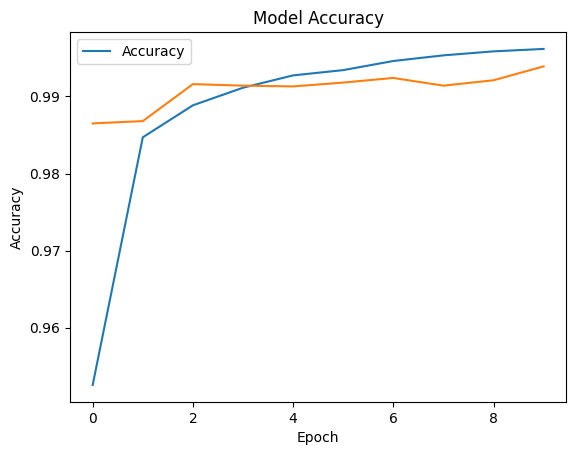

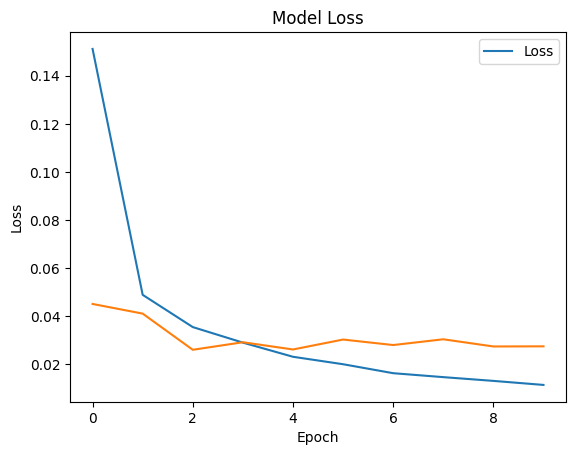

In [19]:
#Visualize the models accuracy
plt.plot(hist.history['accuracy'],label="accuracy")
plt.plot(hist.history['val_accuracy'],label="val_accuracy")
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Accuracy'], loc='upper left')
plt.show()


# In[66]:


#Visualize the models loss
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Loss'], loc='upper right')
plt.show()


# In[67]:


## Predict pictures

1/1 [==============================] - 0s 17ms/step
Actual:      [0 6 9 0 1 5 9 7 3 4]
Prediction:  [0 6 9 0 1 5 9 7 3 4]


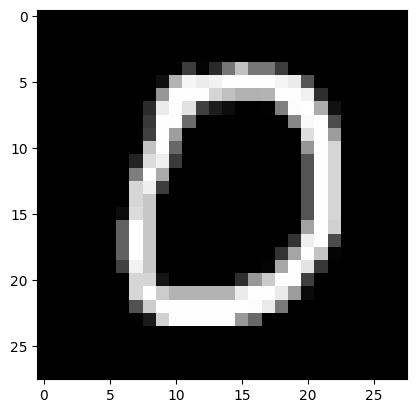

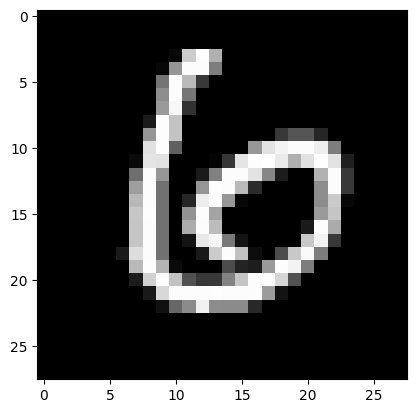

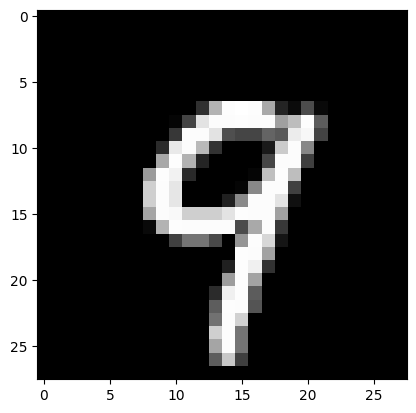

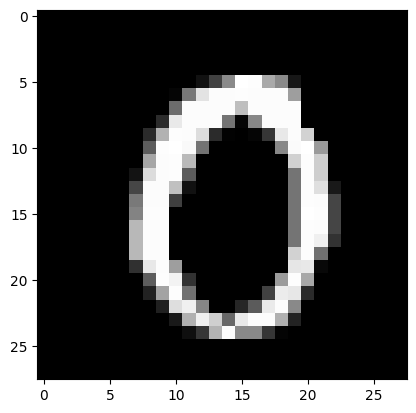

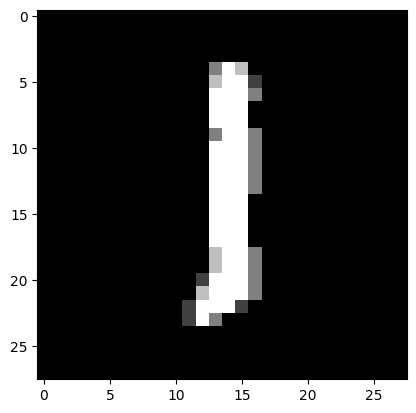

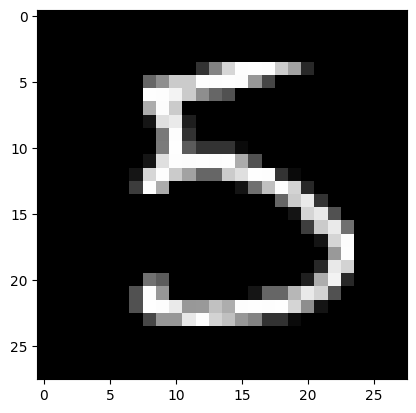

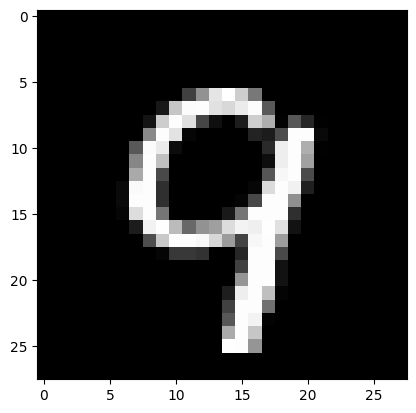

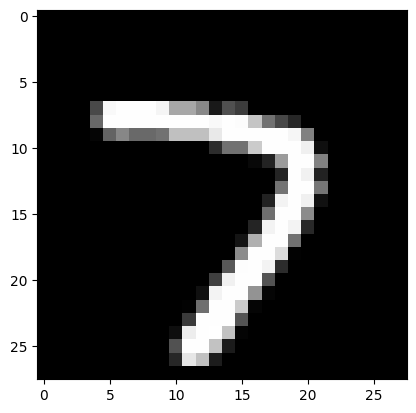

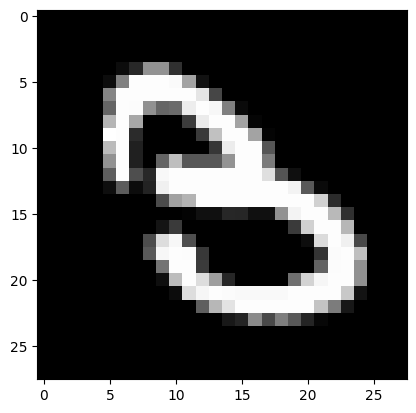

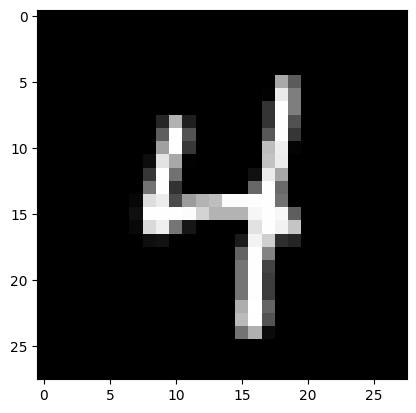

In [24]:


#predict the data
predictions = rec_model.predict(X_test[10:20])
predictions


# In[68]:



#Print the actual labels
print("Actual:     ",y_test[10:20])
#Print our predicitons as number labels for the first 4 images
print("Prediction: ", np.argmax(predictions, axis=1))


# In[69]:


#show the first 4 images as a pictures
for i in range(10,20):
    image = X_test[i]
    image = np.array(image, dtype='float')
    pixels = image.reshape((28,28))
    plt.imshow(pixels, cmap='gray')
    plt.show()

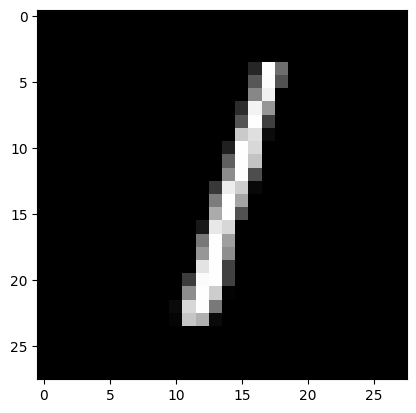

In [26]:
image = X_test[2]
image = np.array(image, dtype='float')
pixels = image.reshape((28,28))
plt.imshow(pixels, cmap='gray')


In [22]:
predictions.shape

(10, 10)

In [23]:
X_test.shape

(10000, 28, 28, 1)

In [ ]:
np.array(resized_image).shape

(28, 28, 3)